In [3]:
from openbb_terminal.sdk import openbb
import databento as db
import pandas as pd


client = db.Historical('db-D3u5yvG3cfVFfQLPSNwk7FVsELwTx')
def rank_by_volume(top=10):
    data = client.timeseries.get_range(
        dataset='GLBX.MDP3',
        symbols='ALL_SYMBOLS',
        schema='ohlcv-1d',
        start='2024-04-01',
        end='2024-05-02'
    )
    df = data.to_df()
    return df.sort_values(by='volume', ascending=False).instrument_id.tolist()[:top]

top_instruments = rank_by_volume()
print(top_instruments)

[42004501, 42004501, 42004501, 42004501, 42004501, 42035227, 42004501, 5602, 42004501, 5602]


In [10]:
def get_child_instruments(parents=['CL.FUT']):
    data = client.timeseries.get_range(
        dataset='GLBX.MDP3',
        stype_in='parent',
        symbols=parents,
        schema='definition',
        start='2024-04-01',
        end='2024-05-01'
    )
    return data.to_df()[['instrument_id', 'raw_symbol']]



In [11]:
databento_instruments = get_child_instruments()
databento_instruments

,instrument_id,raw_symbol
ts_recv,,
2024-04-01 00:00:00+00:00,42286034,CL:C1 HO-CL H7
2024-04-01 00:00:00+00:00,36856,CLF5-CLQ6
2024-04-01 00:00:00+00:00,24567,CLQ5-CLN6
2024-04-01 00:00:00+00:00,42068972,CL:BZ X4-M5
2024-04-01 00:00:00+00:00,42068971,CL:BZ X4-J5
...,...,...
2024-04-30 00:00:00+00:00,42339280,CLM7-CLX7
2024-04-30 00:00:00+00:00,42068985,CL:BZ X4-N5
2024-04-30 00:00:00+00:00,323547,CLM9


,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2022-12-15 00:00:00+00:00,35,1,206323,4004.75,4010.25,3878.50,3895.00,287506,ES.n.1
2022-12-15 00:00:00+00:00,35,1,206299,4037.75,4043.00,3908.00,3926.00,1942417,ES.n.0
2022-12-16 00:00:00+00:00,35,1,206323,3896.50,3904.25,3842.00,3868.75,17454,ES.n.1
2022-12-16 00:00:00+00:00,35,1,206299,3926.25,3934.50,3855.25,3872.00,1813729,ES.n.0
2022-12-18 00:00:00+00:00,35,1,206299,3874.00,3886.75,3872.75,3880.50,16109,ES.n.0


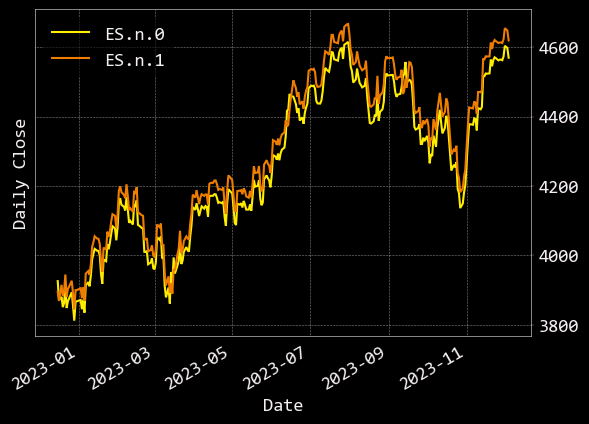

In [21]:
import databento as db
import matplotlib.pyplot as plt

client = db.Historical("db-D3u5yvG3cfVFfQLPSNwk7FVsELwTx")

df = client.timeseries.get_range(
    dataset="GLBX.MDP3",
    schema="ohlcv-1d",
    stype_in="continuous",
    symbols=["ES.n.0", "ES.n.1"],
    start="2022-12-15",
    end="2023-12-04",
).to_df()

df.groupby("symbol").close.plot()
plt.xlabel("Date")
plt.ylabel("Daily Close")
plt.legend()

df.head()

In [22]:
import plotly.express as px
# Grouping the DataFrame by 'symbol' and then iterating over each group
fig = px.line()  # Create a blank figure

for symbol, group in df.groupby("symbol"):
    fig.add_scatter(x=group.index, y=group['close'], mode='lines', name=symbol)

# Updating layout if needed
fig.update_layout(
    title='Close Price by Symbol',
    xaxis_title='Date',
    yaxis_title='Close Price'
)

fig.show()


In [23]:
df

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2022-12-15 00:00:00+00:00,35,1,206323,4004.75,4010.25,3878.50,3895.00,287506,ES.n.1
2022-12-15 00:00:00+00:00,35,1,206299,4037.75,4043.00,3908.00,3926.00,1942417,ES.n.0
2022-12-16 00:00:00+00:00,35,1,206323,3896.50,3904.25,3842.00,3868.75,17454,ES.n.1
2022-12-16 00:00:00+00:00,35,1,206299,3926.25,3934.50,3855.25,3872.00,1813729,ES.n.0
2022-12-18 00:00:00+00:00,35,1,206299,3874.00,3886.75,3872.75,3880.50,16109,ES.n.0
...,...,...,...,...,...,...,...,...,...
2023-12-01 00:00:00+00:00,35,1,17077,4622.00,4657.75,4612.75,4654.75,9575,ES.n.1
2023-12-03 00:00:00+00:00,35,1,314863,4603.25,4604.50,4597.50,4597.75,17155,ES.n.0
2023-12-03 00:00:00+00:00,35,1,17077,4653.50,4654.75,4647.75,4648.00,138,ES.n.1
